## Predicting compressive strength based on the ingredients of the sample is the goal of this project.

We use Keras regression Neural Network to build our model.


<strong>The dataset is about the compressive strength of different samples of concrete based on the volumes of the different ingredients that were used to make them. Ingredients include:</strong>

<strong>1. Cement</strong>

<strong>2. Blast Furnace Slag</strong>

<strong>3. Fly Ash</strong>

<strong>4. Water</strong>

<strong>5. Superplasticizer</strong>

<strong>6. Coarse Aggregate</strong>

<strong>7. Fine Aggregate</strong>

### Import useful libraries for this project

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Dense
import statistics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


### Download Dataset

Let's download the data and read it into a <em>pandas</em> dataframe, after importing libraries

In [2]:
concrete_data = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv')
concrete_data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


### Divide the data into predictor and target

In [3]:
concrete_data_columns = concrete_data.columns
predictors = concrete_data[concrete_data_columns[concrete_data_columns != 'Strength']] # all columns except Strength
target = concrete_data['Strength'] # Strength column

In [4]:
n_cols = predictors.shape[1] # number of predictors

## Train test split

In [5]:
from sklearn.model_selection import train_test_split
test_size=0.3
train_X, test_X, train_target, test_target=train_test_split(predictors,target,test_size=test_size, random_state=42 )
print('Is the test size {} percent of the data size? '.format(test_size*100), len(test_target)==len(target)*test_size)

Is the test size 30.0 percent of the data size?  True


# A. Build a baseline model 

### Build the model

In [6]:
# define regression model
def regression_model():
    # create model
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(1))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model
model = regression_model()

Instructions for updating:
Colocations handled automatically by placer.


In [7]:
SQE=[] # This variable is defined to record the mean square error
for i in range(50):
    
    model.fit(train_X, train_target, validation_split=0.3, epochs=50, verbose=0)
    predictions= model.predict(test_X)
    predictions=(np.squeeze(predictions))
    SQE.append(mean_squared_error(test_target,predictions)) # here we append the mean square error value for each i
# We can also measure the mean square error from the following line:
#     SQE.append(np.mean(np.power((test_target-predictions),2)))

Instructions for updating:
Use tf.cast instead.


In [8]:
# Reporting result
print('The mean of repeating the keras algorithm 50 times is: ',np.mean(SQE))
print('The standard deviation of repeating the keras algorithm 50 times is: ',statistics.stdev(SQE))

# I will use the following two variables later for plotting mean, std of the mean square error 
mean_SQE=np.zeros(len(SQE))+np.mean(SQE)
stdev_SQE=np.zeros(len(SQE))+statistics.stdev(SQE)

The mean of repeating the keras algorithm 50 times is:  51.906186470228896
The standard deviation of repeating the keras algorithm 50 times is:  6.385954852387294


# B. Build the model on Normalized data

In [9]:
train_X= (train_X - predictors.mean()) / predictors.std()
test_X=(test_X - predictors.mean()) / predictors.std()

In [10]:
SQE_norm=[] # This variable is defined to record the mean square error
for i in range(50):
    
    model.fit(train_X, train_target, validation_split=0.3, epochs=50, verbose=0)
    predictions= model.predict(test_X)
    predictions=(np.squeeze(predictions))
    SQE_norm.append(mean_squared_error(test_target,predictions))  #here we append the mean square error value for each i

In [11]:
# Reporting result
print('The mean of repeating the keras algorithm 50 times on normalized data is: ',np.mean(SQE_norm))
print('The standard deviation of repeating the keras algorithm 50 times on normalized data  is: ',statistics.stdev(SQE_norm))

# I will use the following two variables later for plotting mean, std of the mean square error 
mean_SQE_norm=np.zeros(len(SQE_norm))+np.mean(SQE_norm)
stdev_SQE_norm=np.zeros(len(SQE_norm))+statistics.stdev(SQE_norm)

The mean of repeating the keras algorithm 50 times on normalized data is:  60.68950801035161
The standard deviation of repeating the keras algorithm 50 times on normalized data  is:  39.90060368207111


# C. Build the model with higher epoches

In [12]:
SQE_norm_high_epochs=[] # This variable is defined to record the mean square error for every repeat of the keras fitting
for i in range(50):
    
    model.fit(train_X, train_target, validation_split=0.3, epochs=100, verbose=0)
    predictions= model.predict(test_X)
    predictions=(np.squeeze(predictions))
    SQE_norm_high_epochs.append(mean_squared_error(test_target,predictions)) #here we append the mean square error value for each i

In [13]:
# Reporting result
print('The mean of repeating the keras algorithm 50 times with higher number of epoches is: ',np.mean(SQE_norm_high_epochs))
print('The standard deviation of repeating the keras algorithm 50 times with higher number of epoches is: ',statistics.stdev(SQE_norm_high_epochs))


# I will use the following two variables later for plotting mean, std of the mean square error 
mean_SQE_norm_high_epochs=np.zeros(len(SQE_norm_high_epochs))+np.mean(SQE_norm_high_epochs)
stdev_SQE_norm_high_epochs=np.zeros(len(SQE_norm_high_epochs))+statistics.stdev(SQE_norm_high_epochs)

The mean of repeating the keras algorithm 50 times with higher number of epoches is:  41.65538009205793
The standard deviation of repeating the keras algorithm 50 times with higher number of epoches is:  0.7232389734138385


# D. Build the model with more hidden layers

### Define a new regression model with more hidden layers

In [14]:
# define regression model
def regression_model():
    # create model
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(10, activation='relu'))


    model.add(Dense(1))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model
model = regression_model()

In [15]:
SQE_norm_high_hidden_layers=[] # This variable is defined to record the mean square error for every repeat of the keras fitting
for i in range(50):
    
    model.fit(train_X, train_target, validation_split=0.3, epochs=50, verbose=0)
    predictions= model.predict(test_X)
    predictions=(np.squeeze(predictions))
    SQE_norm_high_hidden_layers.append(mean_squared_error(test_target,predictions)) #here we append the mean square error value for each i

In [16]:
# Reporting result
print('The mean of repeating the keras algorithm 50 times is: ',np.mean(SQE_norm_high_hidden_layers))
print('The standard deviation of repeating the keras algorithm 50 times is: ',statistics.stdev(SQE_norm_high_hidden_layers))

# I will use the following two variables later for plotting mean, std of the mean square error 
mean_SQE_norm_high_hidden_layers=np.zeros(len(SQE_norm_high_hidden_layers))+np.mean(SQE_norm_high_hidden_layers)
stdev_SQE_norm_high_hidden_layers=np.zeros(len(SQE_norm_high_hidden_layers))+statistics.stdev(SQE_norm_high_hidden_layers)

The mean of repeating the keras algorithm 50 times is:  44.23135149740808
The standard deviation of repeating the keras algorithm 50 times is:  11.547528537875081


# Reporting the results

In [17]:
accuracy_measurement={'Section Name':['A','B (normal)','C ( more epoches )','D ( more hidden layers )'],'Mean':
                      [np.mean(SQE), np.mean(SQE_norm), np.mean(SQE_norm_high_epochs), np.mean(SQE_norm_high_hidden_layers)],
                      'Standard deviation':[statistics.stdev(SQE), statistics.stdev(SQE_norm), 
                                            statistics.stdev(SQE_norm_high_epochs), statistics.stdev(SQE_norm_high_hidden_layers)]}
report_df=pd.DataFrame(accuracy_measurement)
report_df

,Section Name,Mean,Standard deviation
0,A,51.906186,6.385955
1,B (normal),60.689508,39.900604
2,C ( more epoches ),41.655380,0.723239
3,D ( more hidden layers ),44.231351,11.547529


# Plotting the measn square error result of each section will help in understanding the results

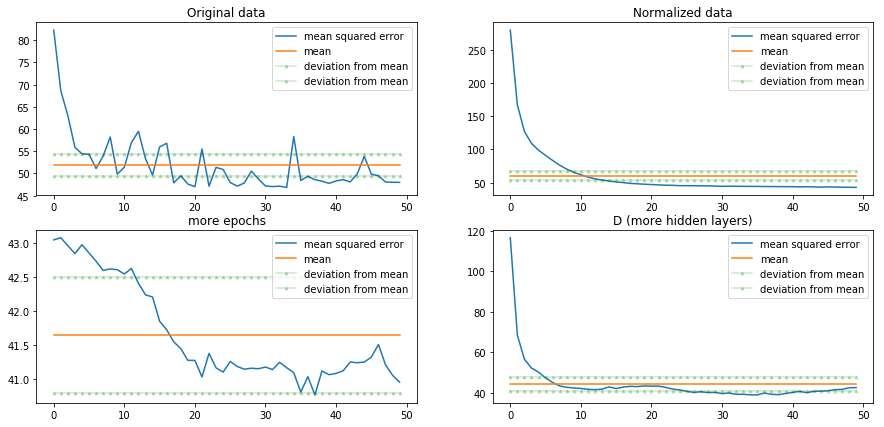

In [18]:
#Plot the figures
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(15, 7))
ax = axes.ravel()

ax[0].plot(SQE, label='mean squared error')
ax[0].plot(mean_SQE, label= 'mean')
ax[0].plot(mean_SQE+np.sqrt(stdev_SQE), label='deviation from mean', color='green',marker='^',markersize=3, alpha=0.2)
ax[0].plot(mean_SQE-np.sqrt(stdev_SQE), label='deviation from mean', color='green',marker='^',markersize=3, alpha=0.2)
ax[0].legend()
ax[0].set_title('Original data')



ax[1].plot(SQE_norm, label='mean squared error')
ax[1].plot(mean_SQE_norm, label= 'mean')
ax[1].plot(mean_SQE_norm+np.sqrt(stdev_SQE_norm), label='deviation from mean', color='green',marker='^',markersize=3, alpha=0.2)
ax[1].plot(mean_SQE_norm-np.sqrt(stdev_SQE_norm), label='deviation from mean', color='green',marker='^',markersize=3, alpha=0.2)
ax[1].legend()
ax[1].set_title('Normalized data')

ax[2].plot(SQE_norm_high_epochs, label='mean squared error')
ax[2].plot(mean_SQE_norm_high_epochs, label= 'mean')
ax[2].plot(mean_SQE_norm_high_epochs+np.sqrt(stdev_SQE_norm_high_epochs), label='deviation from mean', color='green',marker='^',markersize=3, alpha=0.2)
ax[2].plot(mean_SQE_norm_high_epochs-np.sqrt(stdev_SQE_norm_high_epochs), label='deviation from mean', color='green',marker='^',markersize=3, alpha=0.2)
ax[2].legend()
ax[2].set_title('more epochs')


ax[3].plot(SQE_norm_high_hidden_layers, label='mean squared error')
ax[3].plot(mean_SQE_norm_high_hidden_layers, label= 'mean')
ax[3].plot(mean_SQE_norm_high_hidden_layers+np.sqrt(stdev_SQE_norm_high_hidden_layers), label='deviation from mean', color='green',marker='^',markersize=3, alpha=0.2)
ax[3].plot(mean_SQE_norm_high_hidden_layers-np.sqrt(stdev_SQE_norm_high_hidden_layers), label='deviation from mean', color='green',marker='^',markersize=3, alpha=0.2)
ax[3].legend()
ax[3].set_title('D (more hidden layers)')


# for a in ax:
#     a.axis('off')

plt.show()

# Discussion:
### Normalizing the data helps in reducing the mean square error. Having more epochs helps in reducing the mean square error, likewise. However, adding more hidden layers not necessarily helps in minimizing the error.